# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [11]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['acess_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [12]:
client = MongoClient(mongod_connect)
db = client.gp21 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [13]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [14]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [15]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1324142137181700099
1324142137743728643
1324142138565791744
1324142138603397120
1324142138733568001
1324142138720948224
1324142139266117637
1324142139249491977
1324142139798933512
1324142140239339521
1324142140600029186
1324142140688138244
1324142141157699584
1324142142420357120
1324142143338852354
1324142144076967936
1324142146539130881
1324142147147354113
1324142148787294209
1324142149340958721
1324142150372724736
1324142152427966464
1324142153384288259
1324142154751614983
1324142155024224258
1324142156005756928
1324142154416050179
1324142154965540866
1324142160179044355
1324142161533849602
1324142166726291457
1324142166894137349
1324142169104519175
1324142171033870338
1324142171239448577
1324142172824809477
1324142173709864961
1324142172216709120
1324142173730729984
1324142174217396225
1324142175739912193
1324142176394219520
1324142176507437057
1324142176457117702
1324142176595488768
1324142178654932998
1324142178873081857
1324142179523186688
1324142178042564609
1324142182048141314


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [16]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [17]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [18]:
search_results = rest_api.search.tweets( count=count,q=q,) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 05 00:13:59 +0000 2020'
'Thu Nov 05 00:13:59 +0000 2020'
'Thu Nov 05 00:13:58 +0000 2020'
'Thu Nov 05 00:13:58 +0000 2020'
'Thu Nov 05 00:13:57 +0000 2020'
'Thu Nov 05 00:13:57 +0000 2020'
'Thu Nov 05 00:13:56 +0000 2020'
'Thu Nov 05 00:13:56 +0000 2020'
'Thu Nov 05 00:13:55 +0000 2020'
'Thu Nov 05 00:13:55 +0000 2020'
'Thu Nov 05 00:13:55 +0000 2020'
'Thu Nov 05 00:13:54 +0000 2020'
'Thu Nov 05 00:13:54 +0000 2020'
'Thu Nov 05 00:13:54 +0000 2020'
'Thu Nov 05 00:13:53 +0000 2020'
'Thu Nov 05 00:13:53 +0000 2020'
'Thu Nov 05 00:13:52 +0000 2020'
'Thu Nov 05 00:13:52 +0000 2020'
'Thu Nov 05 00:13:52 +0000 2020'
'Thu Nov 05 00:13:52 +0000 2020'
'Thu Nov 05 00:13:51 +0000 2020'
'Thu Nov 05 00:13:51 +0000 2020'
'Thu Nov 05 00:13:50 +0000 2020'
'Thu Nov 05 00:13:50 +0000 2020'
'Thu Nov 05 00:13:50 +0000 2020'
'Thu Nov 05 00:13:50 +0000 2020'
'Thu Nov 05 00:13:49 +0000 2020'
'Thu Nov 05 00:13:49 +0000 2020'
'Thu Nov 05 00:13:48 +0000 2020'
'Thu Nov 05 00:13:48 +0000 2020'
'Thu Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [19]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 05 00:13:16 +0000 2020'
'Thu Nov 05 00:13:15 +0000 2020'
'Thu Nov 05 00:13:15 +0000 2020'
'Thu Nov 05 00:13:15 +0000 2020'
'Thu Nov 05 00:13:14 +0000 2020'
'Thu Nov 05 00:13:13 +0000 2020'
'Thu Nov 05 00:13:13 +0000 2020'
'Thu Nov 05 00:13:13 +0000 2020'
'Thu Nov 05 00:13:11 +0000 2020'
'Thu Nov 05 00:13:11 +0000 2020'
'Thu Nov 05 00:13:11 +0000 2020'
'Thu Nov 05 00:13:11 +0000 2020'
'Thu Nov 05 00:13:10 +0000 2020'
'Thu Nov 05 00:13:10 +0000 2020'
'Thu Nov 05 00:13:10 +0000 2020'
'Thu Nov 05 00:13:09 +0000 2020'
'Thu Nov 05 00:13:09 +0000 2020'
'Thu Nov 05 00:13:09 +0000 2020'
'Thu Nov 05 00:13:08 +0000 2020'
'Thu Nov 05 00:13:08 +0000 2020'
'Thu Nov 05 00:13:08 +0000 2020'
'Thu Nov 05 00:13:08 +0000 2020'
'Thu Nov 05 00:13:07 +0000 2020'
'Thu Nov 05 00:13:07 +0000 2020'
'Thu Nov 05 00:13:07 +0000 2020'
'Thu Nov 05 00:13:07 +0000 2020'
'Thu Nov 05 00:13:07 +0000 2020'
'Thu Nov 05 00:13:06 +0000 2020'
'Thu Nov 05 00:13:06 +0000 2020'
'Thu Nov 05 00:13:06 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:11:49 +0000 2020'
'Thu Nov 05 00:11:48 +0000 2020'
'Thu Nov 05 00:11:48 +0000 2020'
'Thu Nov 05 00:11:48 +0000 2020'
'Thu Nov 05 00:11:48 +0000 2020'
'Thu Nov 05 00:11:47 +0000 2020'
'Thu Nov 05 00:11:47 +0000 2020'
'Thu Nov 05 00:11:45 +0000 2020'
'Thu Nov 05 00:11:44 +0000 2020'
'Thu Nov 05 00:11:44 +0000 2020'
'Thu Nov 05 00:11:44 +0000 2020'
'Thu Nov 05 00:11:44 +0000 2020'
'Thu Nov 05 00:11:43 +0000 2020'
'Thu Nov 05 00:11:43 +0000 2020'
'Thu Nov 05 00:11:43 +0000 2020'
'Thu Nov 05 00:11:42 +0000 2020'
'Thu Nov 05 00:11:42 +0000 2020'
'Thu Nov 05 00:11:42 +0000 2020'
'Thu Nov 05 00:11:42 +0000 2020'
'Thu Nov 05 00:11:42 +0000 2020'
'Thu Nov 05 00:11:41 +0000 2020'
'Thu Nov 05 00:11:01 +0000 2020'
'Thu Nov 05 00:11:00 +0000 2020'
'Thu Nov 05 00:11:00 +0000 2020'
'Thu Nov 05 00:11:00 +0000 2020'
'Thu Nov 05 00:11:00 +0000 2020'
'Thu Nov 05 00:11:00 +0000 2020'
'Thu Nov 05 00:10:59 +0000 2020'
'Thu Nov 05 00:10:59 +0000 2020'
'Thu Nov 05 00:10:59 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:09:12 +0000 2020'
'Thu Nov 05 00:09:12 +0000 2020'
'Thu Nov 05 00:09:12 +0000 2020'
'Thu Nov 05 00:09:12 +0000 2020'
'Thu Nov 05 00:09:12 +0000 2020'
'Thu Nov 05 00:09:12 +0000 2020'
'Thu Nov 05 00:09:11 +0000 2020'
'Thu Nov 05 00:09:11 +0000 2020'
'Thu Nov 05 00:09:10 +0000 2020'
'Thu Nov 05 00:09:10 +0000 2020'
'Thu Nov 05 00:09:10 +0000 2020'
'Thu Nov 05 00:09:10 +0000 2020'
'Thu Nov 05 00:09:10 +0000 2020'
'Thu Nov 05 00:09:09 +0000 2020'
'Thu Nov 05 00:09:07 +0000 2020'
'Thu Nov 05 00:09:07 +0000 2020'
'Thu Nov 05 00:09:07 +0000 2020'
'Thu Nov 05 00:09:07 +0000 2020'
'Thu Nov 05 00:09:06 +0000 2020'
'Thu Nov 05 00:09:06 +0000 2020'
'Thu Nov 05 00:09:05 +0000 2020'
'Thu Nov 05 00:09:04 +0000 2020'
'Thu Nov 05 00:09:04 +0000 2020'
'Thu Nov 05 00:09:04 +0000 2020'
'Thu Nov 05 00:09:04 +0000 2020'
'Thu Nov 05 00:09:04 +0000 2020'
'Thu Nov 05 00:09:03 +0000 2020'
'Thu Nov 05 00:09:03 +0000 2020'
'Thu Nov 05 00:09:03 +0000 2020'
'Thu Nov 05 00:09:03 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:07:27 +0000 2020'
'Thu Nov 05 00:07:27 +0000 2020'
'Thu Nov 05 00:07:26 +0000 2020'
'Thu Nov 05 00:07:26 +0000 2020'
'Thu Nov 05 00:07:26 +0000 2020'
'Thu Nov 05 00:07:25 +0000 2020'
'Thu Nov 05 00:07:25 +0000 2020'
'Thu Nov 05 00:07:25 +0000 2020'
'Thu Nov 05 00:07:25 +0000 2020'
'Thu Nov 05 00:07:24 +0000 2020'
'Thu Nov 05 00:07:24 +0000 2020'
'Thu Nov 05 00:07:23 +0000 2020'
'Thu Nov 05 00:07:23 +0000 2020'
'Thu Nov 05 00:07:22 +0000 2020'
'Thu Nov 05 00:07:22 +0000 2020'
'Thu Nov 05 00:07:21 +0000 2020'
'Thu Nov 05 00:07:21 +0000 2020'
'Thu Nov 05 00:07:20 +0000 2020'
'Thu Nov 05 00:07:20 +0000 2020'
'Thu Nov 05 00:07:20 +0000 2020'
'Thu Nov 05 00:07:20 +0000 2020'
'Thu Nov 05 00:07:19 +0000 2020'
'Thu Nov 05 00:07:18 +0000 2020'
'Thu Nov 05 00:07:18 +0000 2020'
'Thu Nov 05 00:07:17 +0000 2020'
'Thu Nov 05 00:07:16 +0000 2020'
'Thu Nov 05 00:07:16 +0000 2020'
'Thu Nov 05 00:07:16 +0000 2020'
'Thu Nov 05 00:07:16 +0000 2020'
'Thu Nov 05 00:07:16 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:05:57 +0000 2020'
'Thu Nov 05 00:05:57 +0000 2020'
'Thu Nov 05 00:05:56 +0000 2020'
'Thu Nov 05 00:05:56 +0000 2020'
'Thu Nov 05 00:05:55 +0000 2020'
'Thu Nov 05 00:05:55 +0000 2020'
'Thu Nov 05 00:05:54 +0000 2020'
'Thu Nov 05 00:05:54 +0000 2020'
'Thu Nov 05 00:05:53 +0000 2020'
'Thu Nov 05 00:05:53 +0000 2020'
'Thu Nov 05 00:05:53 +0000 2020'
'Thu Nov 05 00:05:53 +0000 2020'
'Thu Nov 05 00:05:53 +0000 2020'
'Thu Nov 05 00:05:53 +0000 2020'
'Thu Nov 05 00:05:52 +0000 2020'
'Thu Nov 05 00:05:52 +0000 2020'
'Thu Nov 05 00:05:52 +0000 2020'
'Thu Nov 05 00:05:51 +0000 2020'
'Thu Nov 05 00:05:50 +0000 2020'
'Thu Nov 05 00:05:50 +0000 2020'
'Thu Nov 05 00:05:50 +0000 2020'
'Thu Nov 05 00:05:49 +0000 2020'
'Thu Nov 05 00:05:49 +0000 2020'
'Thu Nov 05 00:05:48 +0000 2020'
'Thu Nov 05 00:05:48 +0000 2020'
'Thu Nov 05 00:05:47 +0000 2020'
'Thu Nov 05 00:05:46 +0000 2020'
'Thu Nov 05 00:05:46 +0000 2020'
'Thu Nov 05 00:05:46 +0000 2020'
'Thu Nov 05 00:05:46 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:04:20 +0000 2020'
'Thu Nov 05 00:04:20 +0000 2020'
'Thu Nov 05 00:04:20 +0000 2020'
'Thu Nov 05 00:04:20 +0000 2020'
'Thu Nov 05 00:04:20 +0000 2020'
'Thu Nov 05 00:04:19 +0000 2020'
'Thu Nov 05 00:04:19 +0000 2020'
'Thu Nov 05 00:04:19 +0000 2020'
'Thu Nov 05 00:04:19 +0000 2020'
'Thu Nov 05 00:04:18 +0000 2020'
'Thu Nov 05 00:04:18 +0000 2020'
'Thu Nov 05 00:04:18 +0000 2020'
'Thu Nov 05 00:04:18 +0000 2020'
'Thu Nov 05 00:04:17 +0000 2020'
'Thu Nov 05 00:04:17 +0000 2020'
'Thu Nov 05 00:04:17 +0000 2020'
'Thu Nov 05 00:04:17 +0000 2020'
'Thu Nov 05 00:04:16 +0000 2020'
'Thu Nov 05 00:04:16 +0000 2020'
'Thu Nov 05 00:04:16 +0000 2020'
'Thu Nov 05 00:04:16 +0000 2020'
'Thu Nov 05 00:04:15 +0000 2020'
'Thu Nov 05 00:04:15 +0000 2020'
'Thu Nov 05 00:04:15 +0000 2020'
'Thu Nov 05 00:04:15 +0000 2020'
'Thu Nov 05 00:04:15 +0000 2020'
'Thu Nov 05 00:04:14 +0000 2020'
'Thu Nov 05 00:04:14 +0000 2020'
'Thu Nov 05 00:04:14 +0000 2020'
'Thu Nov 05 00:04:14 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:02:38 +0000 2020'
'Thu Nov 05 00:02:38 +0000 2020'
'Thu Nov 05 00:02:37 +0000 2020'
'Thu Nov 05 00:02:37 +0000 2020'
'Thu Nov 05 00:02:36 +0000 2020'
'Thu Nov 05 00:02:35 +0000 2020'
'Thu Nov 05 00:02:34 +0000 2020'
'Thu Nov 05 00:02:34 +0000 2020'
'Thu Nov 05 00:02:34 +0000 2020'
'Thu Nov 05 00:02:33 +0000 2020'
'Thu Nov 05 00:02:32 +0000 2020'
'Thu Nov 05 00:02:32 +0000 2020'
'Thu Nov 05 00:02:31 +0000 2020'
'Thu Nov 05 00:02:31 +0000 2020'
'Thu Nov 05 00:02:30 +0000 2020'
'Thu Nov 05 00:02:30 +0000 2020'
'Thu Nov 05 00:02:29 +0000 2020'
'Thu Nov 05 00:02:29 +0000 2020'
'Thu Nov 05 00:02:29 +0000 2020'
'Thu Nov 05 00:02:29 +0000 2020'
'Thu Nov 05 00:02:29 +0000 2020'
'Thu Nov 05 00:02:29 +0000 2020'
'Thu Nov 05 00:02:28 +0000 2020'
'Thu Nov 05 00:02:28 +0000 2020'
'Thu Nov 05 00:02:28 +0000 2020'
'Thu Nov 05 00:02:27 +0000 2020'
'Thu Nov 05 00:02:27 +0000 2020'
'Thu Nov 05 00:02:27 +0000 2020'
'Thu Nov 05 00:02:27 +0000 2020'
'Thu Nov 05 00:02:27 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:01:12 +0000 2020'
'Thu Nov 05 00:01:11 +0000 2020'
'Thu Nov 05 00:01:11 +0000 2020'
'Thu Nov 05 00:01:11 +0000 2020'
'Thu Nov 05 00:01:11 +0000 2020'
'Thu Nov 05 00:01:10 +0000 2020'
'Thu Nov 05 00:01:10 +0000 2020'
'Thu Nov 05 00:01:10 +0000 2020'
'Thu Nov 05 00:01:10 +0000 2020'
'Thu Nov 05 00:01:10 +0000 2020'
'Thu Nov 05 00:01:10 +0000 2020'
'Thu Nov 05 00:01:09 +0000 2020'
'Thu Nov 05 00:01:09 +0000 2020'
'Thu Nov 05 00:01:09 +0000 2020'
'Thu Nov 05 00:01:09 +0000 2020'
'Thu Nov 05 00:01:09 +0000 2020'
'Thu Nov 05 00:01:09 +0000 2020'
'Thu Nov 05 00:01:08 +0000 2020'
'Thu Nov 05 00:01:08 +0000 2020'
'Thu Nov 05 00:01:08 +0000 2020'
'Thu Nov 05 00:01:08 +0000 2020'
'Thu Nov 05 00:01:08 +0000 2020'
'Thu Nov 05 00:01:07 +0000 2020'
'Thu Nov 05 00:01:06 +0000 2020'
'Thu Nov 05 00:01:06 +0000 2020'
'Thu Nov 05 00:01:06 +0000 2020'
'Thu Nov 05 00:01:06 +0000 2020'
'Thu Nov 05 00:01:06 +0000 2020'
'Thu Nov 05 00:01:06 +0000 2020'
'Thu Nov 05 00:01:06 +0000 2020'
'Thu Nov 0

'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Thu Nov 05 00:00:00 +0000 2020'
'Wed Nov 04 23:59:59 +0000 2020'
'Wed Nov 04 23:59:59 +0000 2020'
'Wed Nov 04 23:59:58 +0000 2020'
'Wed Nov 04 23:59:58 +0000 2020'
'Wed Nov 04 23:59:58 +0000 2020'
'Wed Nov 04 23:59:57 +0000 2020'
'Wed Nov 04 23:59:57 +0000 2020'
'Wed Nov 04 23:59:57 +0000 2020'
'Wed Nov 04 23:59:57 +0000 2020'
'Wed Nov 04 23:59:56 +0000 2020'
'Wed Nov 04 23:59:56 +0000 2020'
'Wed Nov 04 23:59:56 +0000 2020'
'Wed Nov 04 23:59:55 +0000 2020'
'Wed Nov 04 23:59:55 +0000 2020'
'Wed Nov 04 23:59:55 +0000 2020'
'Wed Nov 04 23:59:55 +0000 2020'
'Wed Nov 04 23:59:55 +0000 2020'
'Wed Nov 04 23:59:54 +0000 2020'
'Wed Nov 0

'Wed Nov 04 23:58:31 +0000 2020'
'Wed Nov 04 23:58:31 +0000 2020'
'Wed Nov 04 23:58:30 +0000 2020'
'Wed Nov 04 23:58:30 +0000 2020'
'Wed Nov 04 23:58:30 +0000 2020'
'Wed Nov 04 23:58:30 +0000 2020'
'Wed Nov 04 23:58:29 +0000 2020'
'Wed Nov 04 23:58:29 +0000 2020'
'Wed Nov 04 23:58:28 +0000 2020'
'Wed Nov 04 23:58:28 +0000 2020'
'Wed Nov 04 23:58:26 +0000 2020'
'Wed Nov 04 23:58:25 +0000 2020'
'Wed Nov 04 23:58:25 +0000 2020'
'Wed Nov 04 23:58:25 +0000 2020'
'Wed Nov 04 23:58:25 +0000 2020'
'Wed Nov 04 23:58:24 +0000 2020'
'Wed Nov 04 23:58:24 +0000 2020'
'Wed Nov 04 23:58:24 +0000 2020'
'Wed Nov 04 23:58:24 +0000 2020'
'Wed Nov 04 23:58:24 +0000 2020'
'Wed Nov 04 23:58:23 +0000 2020'
'Wed Nov 04 23:58:23 +0000 2020'
'Wed Nov 04 23:58:22 +0000 2020'
'Wed Nov 04 23:58:21 +0000 2020'
'Wed Nov 04 23:58:21 +0000 2020'
'Wed Nov 04 23:58:21 +0000 2020'
'Wed Nov 04 23:58:20 +0000 2020'
'Wed Nov 04 23:58:20 +0000 2020'
'Wed Nov 04 23:58:20 +0000 2020'
'Wed Nov 04 23:58:19 +0000 2020'
'Wed Nov 0

'Wed Nov 04 23:56:53 +0000 2020'
'Wed Nov 04 23:56:53 +0000 2020'
'Wed Nov 04 23:56:52 +0000 2020'
'Wed Nov 04 23:56:52 +0000 2020'
'Wed Nov 04 23:56:52 +0000 2020'
'Wed Nov 04 23:56:51 +0000 2020'
'Wed Nov 04 23:56:51 +0000 2020'
'Wed Nov 04 23:56:50 +0000 2020'
'Wed Nov 04 23:56:50 +0000 2020'
'Wed Nov 04 23:56:49 +0000 2020'
'Wed Nov 04 23:56:49 +0000 2020'
'Wed Nov 04 23:56:48 +0000 2020'
'Wed Nov 04 23:56:48 +0000 2020'
'Wed Nov 04 23:56:48 +0000 2020'
'Wed Nov 04 23:56:47 +0000 2020'
'Wed Nov 04 23:56:47 +0000 2020'
'Wed Nov 04 23:56:47 +0000 2020'
'Wed Nov 04 23:56:47 +0000 2020'
'Wed Nov 04 23:56:46 +0000 2020'
'Wed Nov 04 23:56:46 +0000 2020'
'Wed Nov 04 23:56:45 +0000 2020'
'Wed Nov 04 23:56:45 +0000 2020'
'Wed Nov 04 23:56:44 +0000 2020'
'Wed Nov 04 23:56:44 +0000 2020'
'Wed Nov 04 23:56:44 +0000 2020'
'Wed Nov 04 23:56:44 +0000 2020'
'Wed Nov 04 23:56:44 +0000 2020'
'Wed Nov 04 23:56:44 +0000 2020'
'Wed Nov 04 23:56:43 +0000 2020'
'Wed Nov 04 23:56:43 +0000 2020'
'Wed Nov 0

'Wed Nov 04 23:55:09 +0000 2020'
'Wed Nov 04 23:55:09 +0000 2020'
'Wed Nov 04 23:55:09 +0000 2020'
'Wed Nov 04 23:55:09 +0000 2020'
'Wed Nov 04 23:55:08 +0000 2020'
'Wed Nov 04 23:55:08 +0000 2020'
'Wed Nov 04 23:55:08 +0000 2020'
'Wed Nov 04 23:55:07 +0000 2020'
'Wed Nov 04 23:55:07 +0000 2020'
'Wed Nov 04 23:55:07 +0000 2020'
'Wed Nov 04 23:55:06 +0000 2020'
'Wed Nov 04 23:55:06 +0000 2020'
'Wed Nov 04 23:55:04 +0000 2020'
'Wed Nov 04 23:55:03 +0000 2020'
'Wed Nov 04 23:55:03 +0000 2020'
'Wed Nov 04 23:55:03 +0000 2020'
'Wed Nov 04 23:55:02 +0000 2020'
'Wed Nov 04 23:55:02 +0000 2020'
'Wed Nov 04 23:55:02 +0000 2020'
'Wed Nov 04 23:55:02 +0000 2020'
'Wed Nov 04 23:55:01 +0000 2020'
'Wed Nov 04 23:55:01 +0000 2020'
'Wed Nov 04 23:55:01 +0000 2020'
'Wed Nov 04 23:55:00 +0000 2020'
'Wed Nov 04 23:55:00 +0000 2020'
'Wed Nov 04 23:55:00 +0000 2020'
'Wed Nov 04 23:55:00 +0000 2020'
'Wed Nov 04 23:55:00 +0000 2020'
'Wed Nov 04 23:55:00 +0000 2020'
'Wed Nov 04 23:55:00 +0000 2020'
'Wed Nov 0

'Wed Nov 04 23:53:32 +0000 2020'
'Wed Nov 04 23:53:32 +0000 2020'
'Wed Nov 04 23:53:32 +0000 2020'
'Wed Nov 04 23:53:32 +0000 2020'
'Wed Nov 04 23:53:32 +0000 2020'
'Wed Nov 04 23:53:31 +0000 2020'
'Wed Nov 04 23:53:31 +0000 2020'
'Wed Nov 04 23:53:31 +0000 2020'
'Wed Nov 04 23:53:31 +0000 2020'
'Wed Nov 04 23:53:31 +0000 2020'
'Wed Nov 04 23:53:30 +0000 2020'
'Wed Nov 04 23:53:30 +0000 2020'
'Wed Nov 04 23:53:30 +0000 2020'
'Wed Nov 04 23:53:29 +0000 2020'
'Wed Nov 04 23:53:28 +0000 2020'
'Wed Nov 04 23:53:28 +0000 2020'
'Wed Nov 04 23:53:28 +0000 2020'
'Wed Nov 04 23:53:27 +0000 2020'
'Wed Nov 04 23:53:27 +0000 2020'
'Wed Nov 04 23:53:27 +0000 2020'
'Wed Nov 04 23:53:27 +0000 2020'
'Wed Nov 04 23:53:27 +0000 2020'
'Wed Nov 04 23:53:26 +0000 2020'
'Wed Nov 04 23:53:26 +0000 2020'
'Wed Nov 04 23:53:26 +0000 2020'
'Wed Nov 04 23:53:26 +0000 2020'
'Wed Nov 04 23:53:26 +0000 2020'
'Wed Nov 04 23:53:26 +0000 2020'
'Wed Nov 04 23:53:23 +0000 2020'
'Wed Nov 04 23:53:23 +0000 2020'
'Wed Nov 0

'Wed Nov 04 23:52:03 +0000 2020'
'Wed Nov 04 23:52:02 +0000 2020'
'Wed Nov 04 23:52:02 +0000 2020'
'Wed Nov 04 23:52:02 +0000 2020'
'Wed Nov 04 23:52:02 +0000 2020'
'Wed Nov 04 23:52:02 +0000 2020'
'Wed Nov 04 23:52:02 +0000 2020'
'Wed Nov 04 23:52:02 +0000 2020'
'Wed Nov 04 23:52:01 +0000 2020'
'Wed Nov 04 23:52:01 +0000 2020'
'Wed Nov 04 23:52:01 +0000 2020'
'Wed Nov 04 23:52:00 +0000 2020'
'Wed Nov 04 23:52:00 +0000 2020'
'Wed Nov 04 23:52:00 +0000 2020'
'Wed Nov 04 23:52:00 +0000 2020'
'Wed Nov 04 23:51:59 +0000 2020'
'Wed Nov 04 23:51:59 +0000 2020'
'Wed Nov 04 23:51:59 +0000 2020'
'Wed Nov 04 23:51:59 +0000 2020'
'Wed Nov 04 23:51:59 +0000 2020'
'Wed Nov 04 23:51:59 +0000 2020'
'Wed Nov 04 23:51:58 +0000 2020'
'Wed Nov 04 23:51:58 +0000 2020'
'Wed Nov 04 23:51:58 +0000 2020'
'Wed Nov 04 23:51:57 +0000 2020'
'Wed Nov 04 23:51:57 +0000 2020'
'Wed Nov 04 23:51:56 +0000 2020'
'Wed Nov 04 23:51:56 +0000 2020'
'Wed Nov 04 23:51:56 +0000 2020'
'Wed Nov 04 23:51:56 +0000 2020'
'Wed Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [20]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3907
3409


Create a text index and print the Tweets containing specific keywords. 

In [21]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [23]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: dominicanlou45
text: Covid19 was made to sabotage the elections
----
name: namesLess TruthOnly
text: @JoeBiden FUCK OFF Joe 
This election was won by covid19 not by you
----
name: MAHE ANOLIKA HUSSEIN.
text: @nytimes This election made in China like a COVID19
----
name: Ashley Nagako
text: So... the election is over. Can anyone explain why Covid19 hasn't magically disappeared?
----
name: 💧Veritas
text: @shreyas Trump: We only have more #COVID19 because we do more tests!  We only lost the election because we counted all the votes!
----
name: The Pe@cock
text: Is it safe to assume that the handling of Covid19 and BLM cost Trump this election?? #Election2020
----
name: Karl Hall🇨🇦#BLM
text: @brycetache It it’s November 4th and Trump no one would be talking about Covid19 after the election
----
name: Rob T. Phantom
text: Big shoutout to the #FultonCounty Election Officials for doing such a good job during the #COVID19 #Pandemic
----
name: Karla Monterroso
text: Covid19 waiting f

In [24]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [25]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,possibly_sensitive,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms
0,5fa3443b21f08179aa5633dd,Wed Nov 04 23:51:05 +0000 2020,1324137119359578113,1324137119359578113,Covid19 was made to sabotage the elections,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa3443a21f08179aa563353,Wed Nov 04 23:51:51 +0000 2020,1324137313224458240,1324137313224458240,@JoeBiden FUCK OFF Joe \nThis election was won...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.324113e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa3442721f08179aa562c00,Thu Nov 05 00:02:25 +0000 2020,1324139973654781954,1324139973654781954,@nytimes This election made in China like a CO...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.324137e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa3443521f08179aa563190,Wed Nov 04 23:54:28 +0000 2020,1324137971180728321,1324137971180728321,So... the election is over. Can anyone explain...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa3443021f08179aa562f64,Wed Nov 04 23:57:50 +0000 2020,1324138818514026496,1324138818514026496,@shreyas Trump: We only have more #COVID19 bec...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.324021e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa3442f21f08179aa562f50,Wed Nov 04 23:57:56 +0000 2020,1324138846011887617,1324138846011887617,Is it safe to assume that the handling of Covi...,False,"{'hashtags': [{'text': 'Election2020', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa3442f21f08179aa562f2e,Wed Nov 04 23:58:11 +0000 2020,1324138906720362496,1324138906720362496,@brycetache It it’s November 4th and Trump no ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.324138e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa3442621f08179aa562b92,Thu Nov 05 00:03:14 +0000 2020,1324140176831094784,1324140176831094784,Big shoutout to the #FultonCounty Election Off...,False,"{'hashtags': [{'text': 'FultonCounty', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa343c921f08179aa56250b,Thu Nov 05 00:13:19 +0000 2020,1324142714988843008,1324142714988843008,Covid19 waiting for the election results like ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa3443721f08179aa56325b,Wed Nov 04 23:53:11 +0000 2020,1324137650165407744,1324137650165407744,The most DIRTY ELECTION IN HISTORY WITH THE MO...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


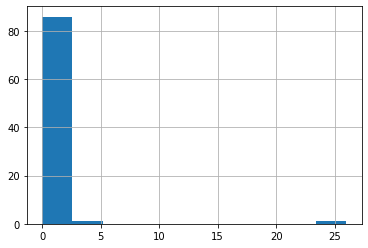

In [27]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count